In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pendulums
% matplotlib inline

In [4]:
#Compare simple and double
data = pendulums.rk4DobPend(0.5, 0.0000001, 0.5, 0.0000001, 0.5, 0.0, 0.0, 0.0, .0001, 75, linearized=False)
t = data[0]
phi1 = data[1]
phi2 = data[2]
w1 = data[3]
w2 = data[4]
L1 = data[5]
L2 = data[6]
m1 = data[7]
m2 = data[8]
g = data[9]

data1 = pendulums.simplePendulum(0.5, 0.5, 0.5, 0, .0001, 75)
t = data1[0]
theta = data1[1]

In [9]:
t.size

750000

In [ ]:
plt.plot(t, phi1, t, theta)

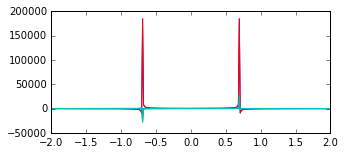

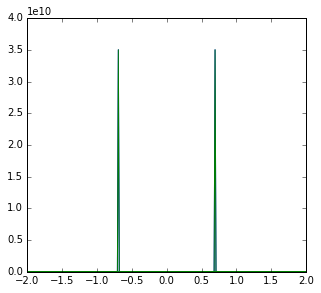

main frequency for simple pendulum: 0.693  period: 1.442
main frequency for double pendulum: 0.693  period: 1.442


In [6]:
import matplotlib
sp = np.fft.fft(theta)
spfreq = np.fft.fftfreq(t.size, 0.0001)
dp = np.fft.fft(phi1)
dpfreq = np.fft.fftfreq(t.size, 0.0001)
powersp = np.abs(sp)**2
powerdp = np.abs(sp)**2
fsp = spfreq[np.argmax(powersp)]
fdp = spfreq[np.argmax(powerdp)]

fig = plt.figure(figsize=(5, 10), dpi=100)
ax = plt.subplot(4,1,1)
ax.plot(spfreq, sp.real)
ax.plot(spfreq, sp.imag)
ax.plot(dpfreq, sp.real)
ax.plot(dpfreq, sp.imag)
ax.set_xlim(-2, 2)
plt.show()

fig = plt.figure(figsize=(5, 10), dpi=100)
ax1 = plt.subplot(2,1,1)
ax1.plot(spfreq, powersp)
ax1.plot(dpfreq, powerdp)
ax1.set_xlim(-2, 2)
plt.show()

fsp = spfreq[np.argmax(powersp)]
print("main frequency for simple pendulum: {0:.3f}  period: {1:.3f}".format(fsp, 1/fsp))
print("main frequency for double pendulum: {0:.3f}  period: {1:.3f}".format(fdp, 1/fdp))

In [11]:
phi1

array([ 0.00872665,  0.00872665,  0.00872664, ...,  0.00605978,
        0.00606256,  0.00606534])

In [ ]:
#compare linearized and nonlinearized
small = pendulums.rk4DobPend(0.1, 0.1, 0.5, 0.5, 0.01, 0.0, 0.0, 0.0, .0001, 75, linearized=True)
smt = small[0]
smphi1 = small[1]
smphi2 = small[2]
smw1 = small[3]
smw2 = small[4]
smL1 = small[5]
smL2 = small[6]
smm1 = small[7]
smm2 = small[8]
smg = small[9]

general = pendulums.rk4DobPend(0.1, 0.1, 0.5, 0.5, 0.01, 0.0, 0.0, 0.0, .0001, 75, linearized=False)
gent = general[0]
genphi1 = general[1]
genphi2 = general[2]
genw1 = general[3]
genw2 = general[4]
genL1 = general[5]
genL2 = general[6]
genm1 = general[7]
genm2 = general[8]
geng = general[9]

In [ ]:
sa = np.fft.fft(smphi1)
safreq = np.fft.fftfreq(smt.size, 0.0001)
gen = np.fft.fft(genphi1)
genfreq = np.fft.fftfreq(gent.size, 0.0001)
powersa = np.abs(sa)**2
powergen = np.abs(gen)**2
fsa = safreq[np.argmax(powersa)]
fgen = genfreq[np.argmax(powergen)]

ax2 = plt.subplot(4,1,1)
ax2.plot(safreq, sa.real)
ax2.plot(safreq, sa.imag)
ax2.plot(genfreq, gen.real)
ax2.plot(genfreq, gen.imag)
ax2.set_xlim(-2, 2)
plt.show()

ax3 = plt.subplot(2,1,1)
ax3.plot(safreq, powersa)
ax3.plot(genfreq, powergen)
ax3.set_xlim(-2, 2)
plt.show()

print("main frequency for pendulum with small angle approximation: {0:.3f}  period: {1:.3f}".format(fsa, 1/fsa))
print("main frequency for general pendulum: {0:.3f}  period: {1:.3f}".format(fgen, 1/fgen))

In [9]:
# Bifurcation Diagram
import numpy as np
import matplotlib.pyplot as plt
import pendulums as pd
% matplotlib inline

Phimax = 90
Phisteps = 0.5
PhiPoints = int(Phimax/Phisteps) + 1
tmax = 100
tsteps = 0.01
tpoints = int(tmax/tsteps)
massmax = 20
massmin = 1
masssteps = 0.01
masspoints = int((massmax - massmin)/masssteps)

massPointsArray = np.arange(massmin, massmax, masssteps)
Mass = np.zeros([masspoints, tpoints])
PhiPointsArray = np.arange(0, Phimax+0.01, Phisteps)
Phi = np.zeros([PhiPoints, tpoints])

for i, phi0 in enumerate(PhiPointsArray):
    Phi[i] = pd.rk4DobPend(0.5, 0.5, 0.5, 0.5, phi0, 0, 0, 0, tsteps, tmax, purpose="bifurcation angle")

#for i, mass in enumerate(massPointsArray):
 #   Mass[i] = pd.rk4DobPend(mass, 0.5, 0.5, 0.8, 90, 0, 0, 0, tsteps, tmax, purpose="bifurcation mass")

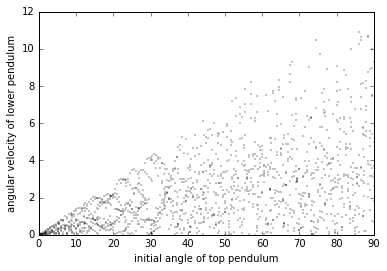

In [16]:
plt.plot(PhiPointsArray[::], np.abs(Phi[::, 9200::100]),'r.', color='black', ms=1, alpha=1);
plt.xlabel("initial angle of top pendulum")
plt.ylabel("angular velocity of lower pendulum")
plt.savefig("angle small bifurcation")
plt.show()

In [17]:
PhiPointsArray.size

315

In [38]:
np.shape(Phi)

(315, 10000)

In [12]:
PhiPointsArray = np.arange(0, Phimax+1, Phisteps)